In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Checking the shape of the dataset
df.shape

(4269, 13)

In [7]:
df.drop(columns='loan_id', inplace=True)

In [9]:
# Checking for null/missing values
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [11]:
# Checking the data types of the columns
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [13]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [15]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [17]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [19]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


Text(0.5, 1.0, 'Number of Dependents')

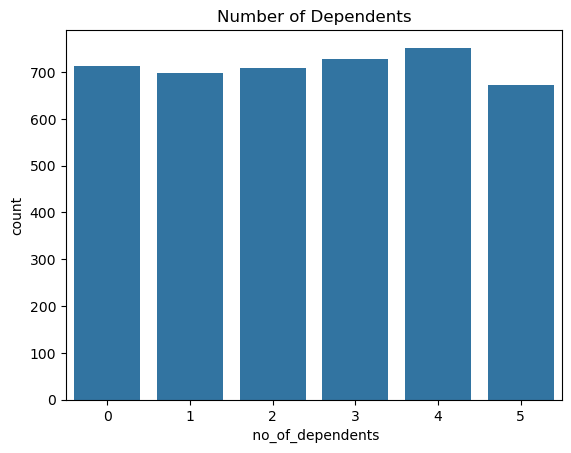

In [21]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

<Axes: xlabel=' education', ylabel=' income_annum'>

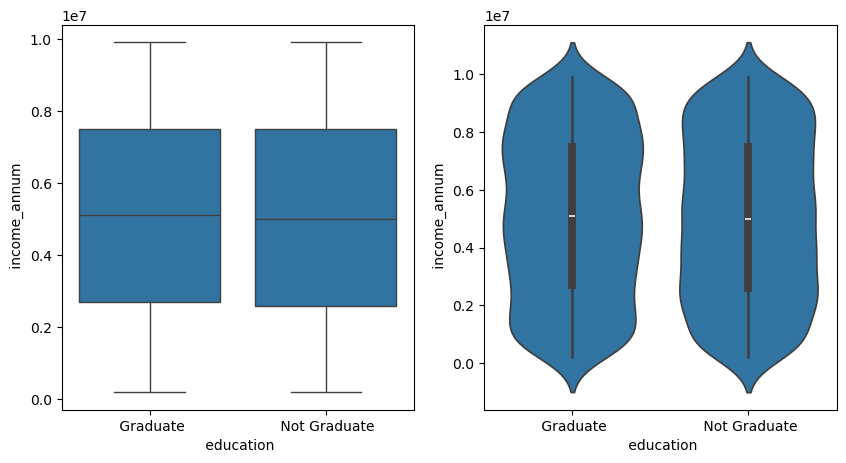

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

Text(0.5, 1.0, 'Self Employed')

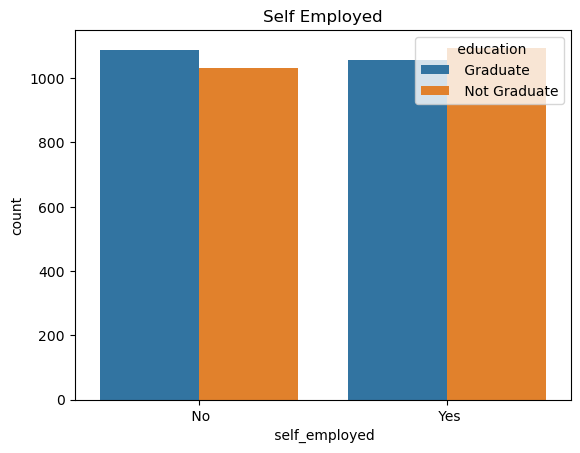

In [25]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

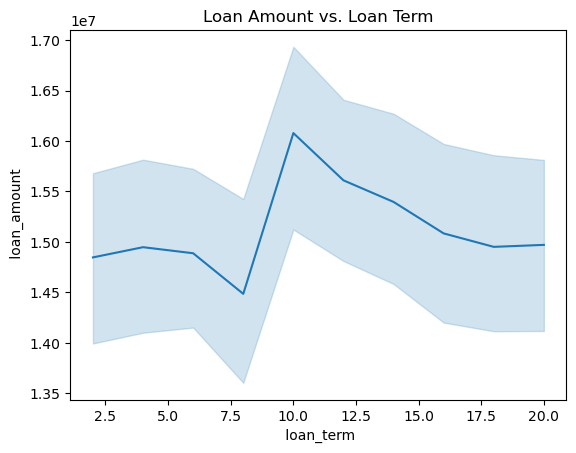

In [27]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

<Axes: xlabel=' cibil_score', ylabel='Count'>

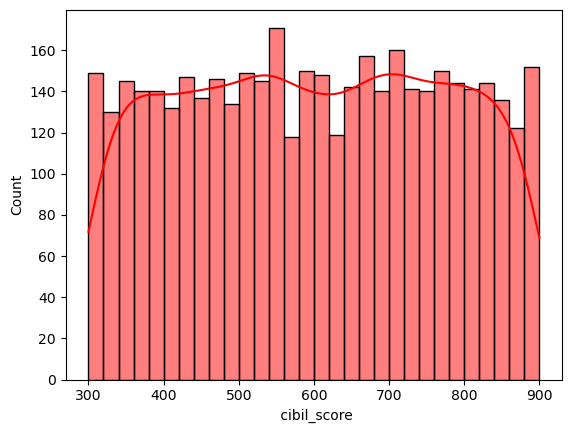

In [29]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

<Axes: xlabel='Immovable_assets', ylabel='Count'>

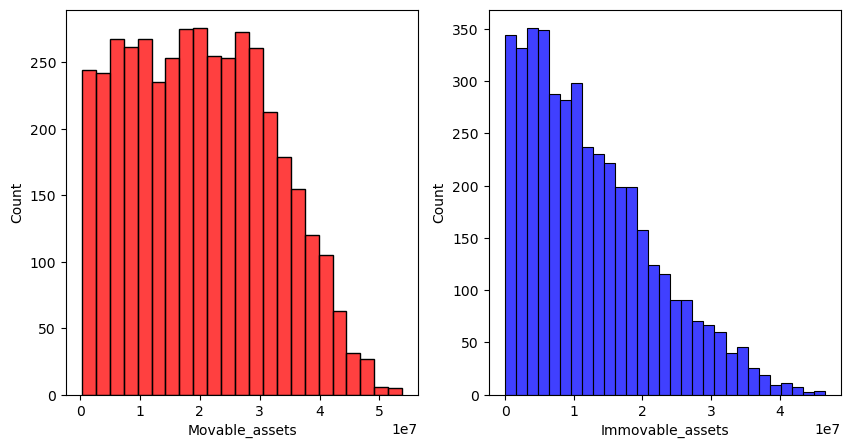

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

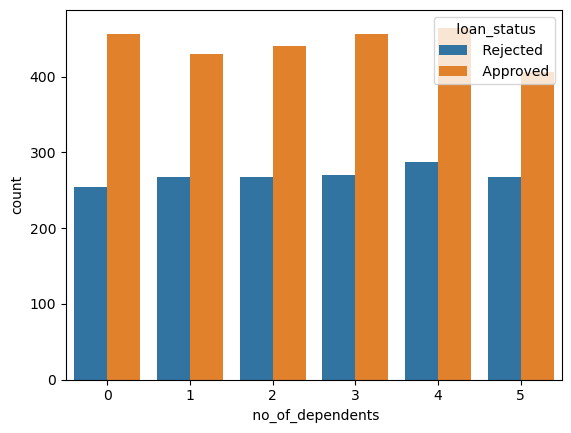

In [33]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

Text(0.5, 1.0, 'Loan Status by Education')

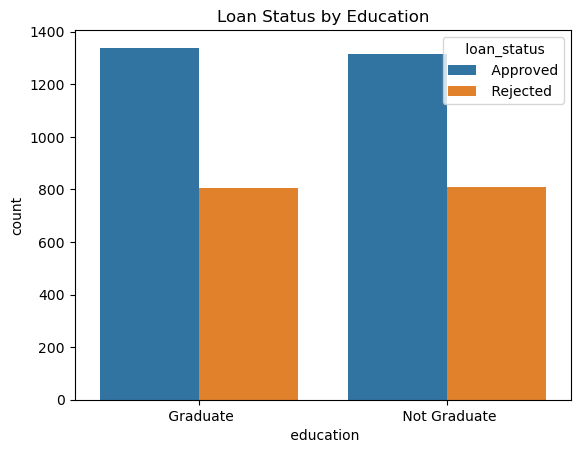

In [35]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

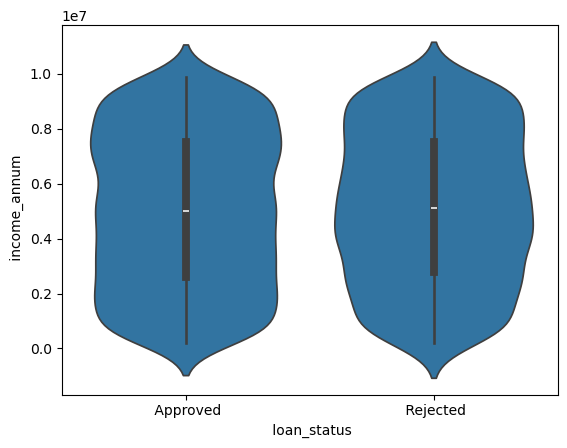

In [37]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

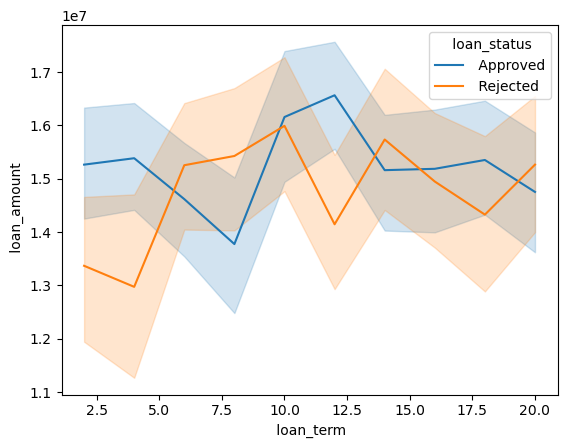

In [39]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

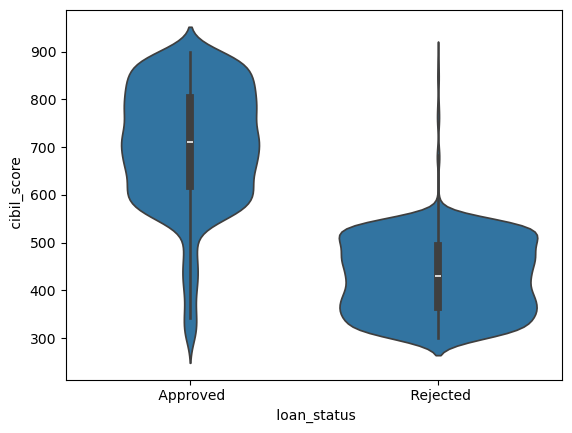

In [41]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

<Axes: xlabel='Immovable_assets', ylabel='Count'>

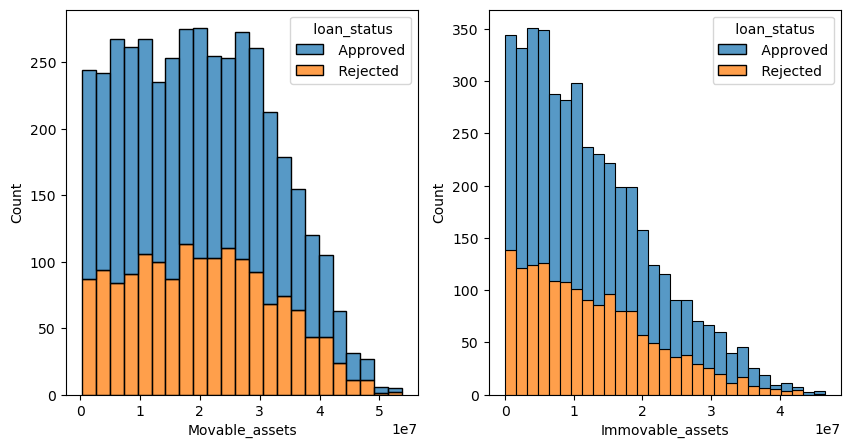

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

In [45]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [47]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


<Axes: >

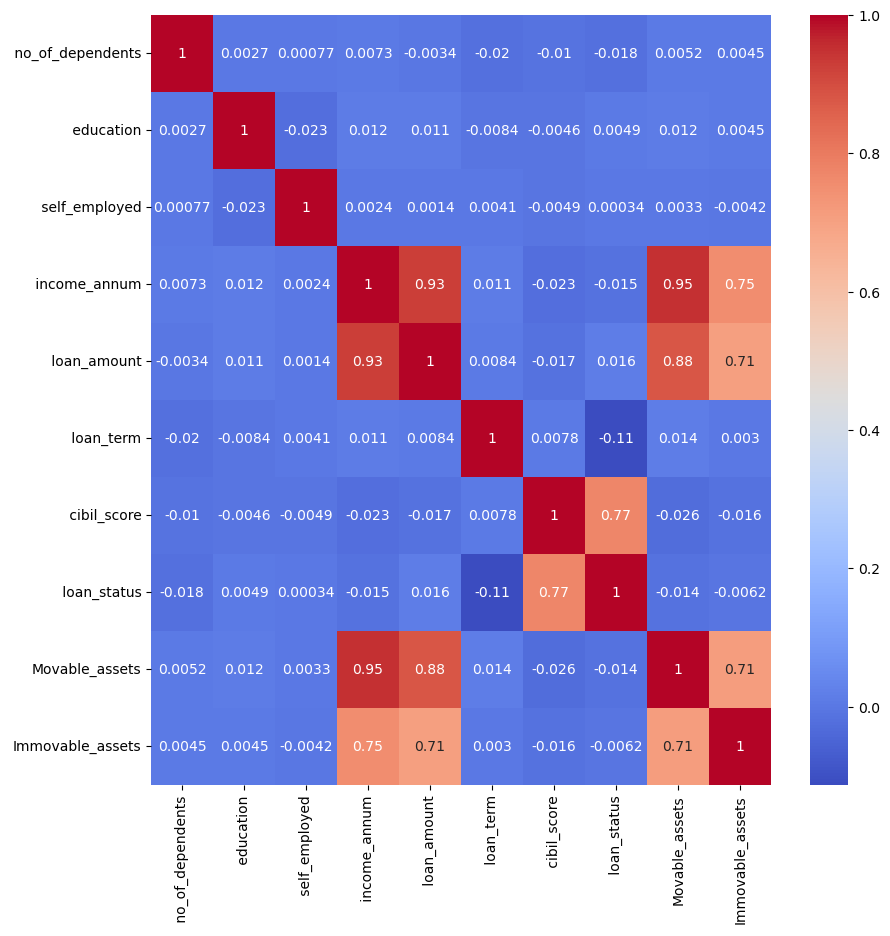

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

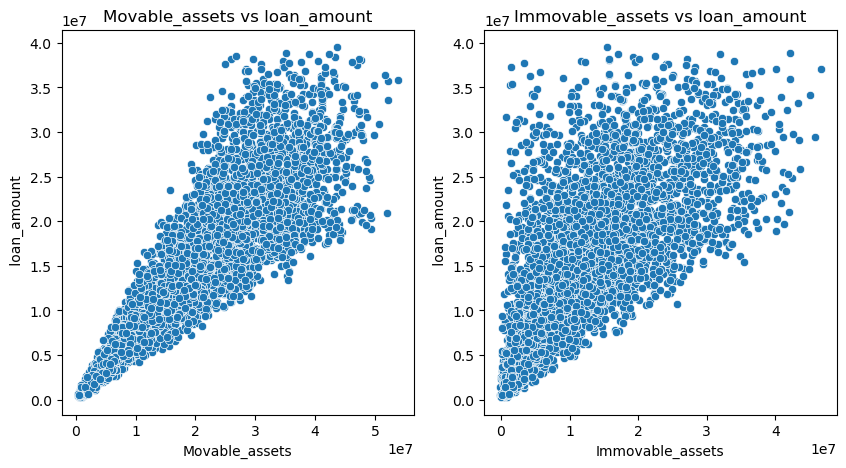

In [51]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

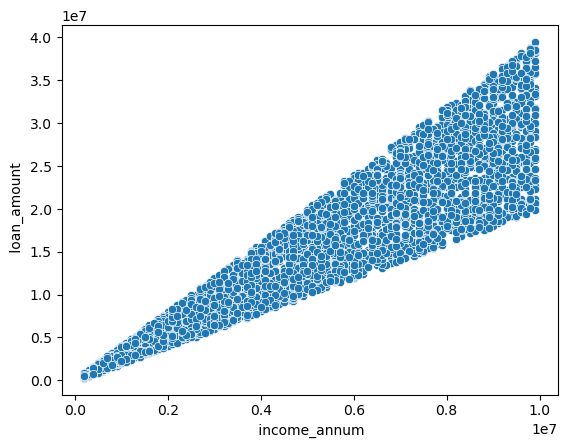

In [53]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [59]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [63]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [67]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [71]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

Text(518.4494949494949, 0.5, 'Actual')

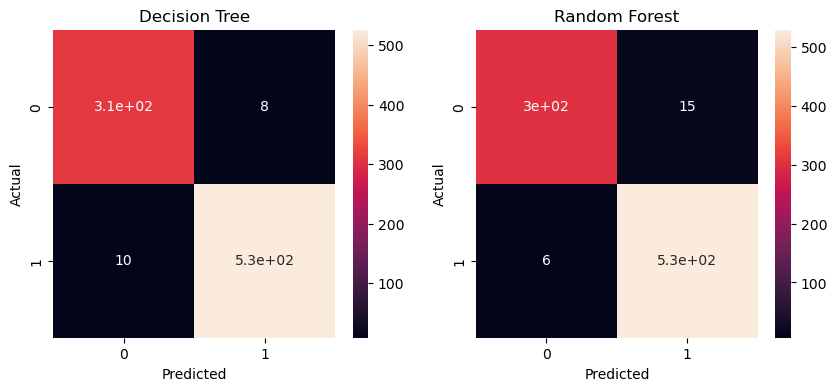

In [73]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

C:\Users\Samarth\AppData\Local\Temp\ipykernel_16024\505637470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\Samarth\AppData\Local\Temp\ipykernel_16024\505637470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

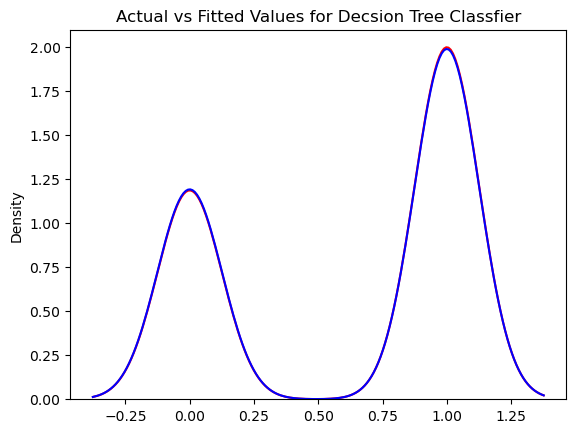

In [77]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\Samarth\AppData\Local\Temp\ipykernel_16024\1367839858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\Samarth\AppData\Local\Temp\ipykernel_16024\1367839858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

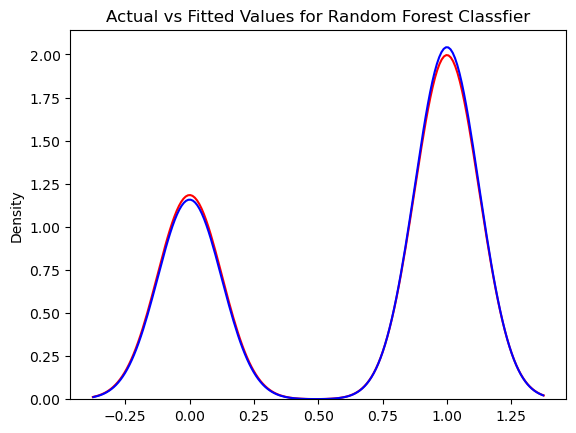

In [79]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9098141368628555
Mean Squared Error:  0.02107728337236534
Mean Absolute Error:  0.02107728337236534


R2 score:  0.8947831596733314
Mean Squared Error:  0.02459016393442623
Mean Absolute Error:  0.02459016393442623


Conclusion
From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:

CIBIL Score: People with higher CIBIL score have higher chances of loan approval
Number of Dependents: People with more number of dependents have less chances of loan approval
Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval
Coming to the machine learning models, I have used Decision Tree Classifier and Random Forest Classifier. Both the models have given excellent results having accuracies - 91.4 % and 89.4 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.